In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [20]:
def hits(G, iterations, tolarance=1.0e-8):
    hubs = dict.fromkeys(G, 1.0 / G.number_of_nodes())
    authorities = {}
    # power iteration, which stops after given iterations or reaching tolerance
    for _ in range(iterations):
        last_hubs = hubs
        hubs = dict.fromkeys(last_hubs.keys(), 0)
        authorities = dict.fromkeys(last_hubs.keys(), 0)
        for node in hubs:
            for neighbor in G[node]:
                authorities[neighbor] += last_hubs[node] * G[node][neighbor].get('weight', 1)
        for node in hubs:
            for neighbor in G[node]:
                hubs[node] += authorities[neighbor] * G[node][neighbor].get('weight', 1)
        scaling = 1.0 / max(hubs.values())
        for node in hubs:
            hubs[node] *= scaling
        scaling = 1.0 / max(authorities.values())
        for node in authorities:
            authorities[node] *= scaling
        err = sum([abs(hubs[node] - last_hubs[node]) for node in hubs])
        if err < tolarance:
            break
    return hubs, authorities

Graph before removing any nodes:


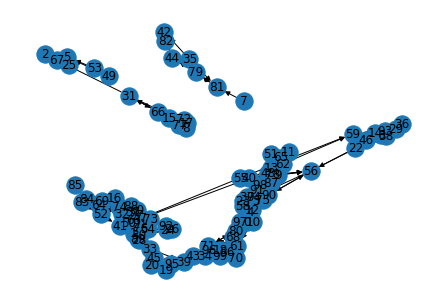

In [21]:
#Initializing the graph
query=input("Enter your query keyword")
print("Graph before removing any nodes:")
G = nx.read_gpickle("web_graph.gpickle")
nx.draw(G, with_labels=True)

In [22]:

root_set = []
base_set=[]
start = time.perf_counter_ns()
for i in range(0,G.number_of_nodes()):
    if( (query in G.nodes[i]['page_content']) or (query.lower() in G.nodes[i]['page_content']) ):
        root_set.append(i)
root_set.sort()
print("Root set: ", root_set)
print('------------------------------------------------------------')
temp = G.to_undirected()
for root_node in root_set:
    base_nodes = temp.neighbors(root_node)
    for base_node in base_nodes:
        if base_node not in base_set:
            base_set.append(base_node)
for i in root_set:
    if i not in base_set:
        base_set.append(i)
base_set.sort()
print("Base set: ", base_set)
print('------------------------------------------------------------')
removed = [x for x in G.nodes if x not in base_set]
print("Removed nodes : ", removed)
print('------------------------------------------------------------')
G.remove_nodes_from(removed)
t1 = time.perf_counter_ns()-start
start = time.perf_counter_ns()
hubs, auths = hits(G,100)


Root set:  [41]
------------------------------------------------------------
Base set:  [33, 41, 52, 89]
------------------------------------------------------------
Removed nodes :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
------------------------------------------------------------


Top 5 hub scores :  {33: 1.0, 41: 0.5, 52: 0.5, 89: 0.0}
------------------------------------------------------------
Top 5 auth scores :  {41: 1.0, 89: 1.0, 33: 0.0, 52: 0.0}
------------------------------------------------------------
Total time taken for this query is : 33.7543 in milliseonds.
Graph after processing query


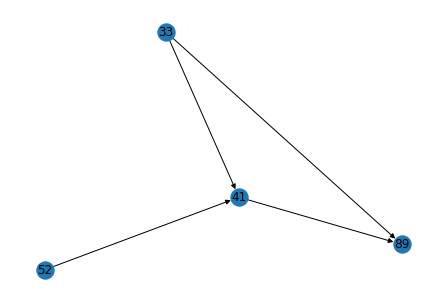

In [23]:
t2 = time.perf_counter_ns()-start
hubs_dict={}
auths_dict={}
for i in base_set:
    hubs_dict[i] = float("{:.5f}".format(hubs[i]))
    auths_dict[i] = float("{:.5f}".format(auths[i]))
    #print(f"Node {i}: Hub score -> {hubs[i]} | Auth Score -> {auths[i]}")
sorted_hubs = dict(sorted(hubs_dict.items(), key=lambda item: item[1], reverse=True)[:5])
sorted_auths = dict(sorted(auths_dict.items(), key=lambda item: item[1], reverse=True)[:5])
print("Top 5 hub scores : ", sorted_hubs)
print('------------------------------------------------------------')

print("Top 5 auth scores : ", sorted_auths)
print('------------------------------------------------------------')
print(f"Total time taken for this query is : {(t1+t2)/1e6} in milliseonds.")
print("Graph after processing query")
nx.draw(G, with_labels=True)

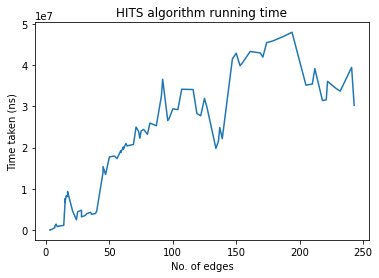

In [24]:
def plot(x,y):
    plt.plot(x,y)
    plt.title("HITS algorithm running time")
    plt.xlabel("No. of edges")
    plt.ylabel("Time taken (ns)")
    plt.show()
    
def stressTest():
    time_values=list()
    n_value = [i for i in range(3,95,1)]
    x=list()
    x2=list()
    for i in n_value:
        G = nx.read_gpickle("web_graph.gpickle")
        start = time.perf_counter_ns()
        for j in range(0,i):
            G.remove_node(j)
        x.append(G.number_of_edges())
        t1 = time.perf_counter_ns()-start
        start = time.perf_counter_ns()
        hubs, auths = hits(G,100)
        t2 = time.perf_counter_ns()-start
        x2.append(i)
        time_values.append(t2)
    n_value = [i ** 2 for i in n_value]
    plot(x,time_values)

stressTest()